In [1]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

from utils.layout import Layout

In [2]:
FIBRO_FILE = "VR/fibro/connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [3]:
d = 115 # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1)) # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro, dim=3)

In [4]:
G_fibro.remove_edges_from(nx.selfloop_edges(G_fibro))
nx.info(G_fibro)

'Graph with 403 nodes and 6866 edges'

In [5]:
layout = Layout(G_fibro, pos, node_colors=[(248, 177, 0, 100)], edge_colors=[(248, 177, 0, 100)])

In [6]:
#layout.write("VR/fibro/fibro")

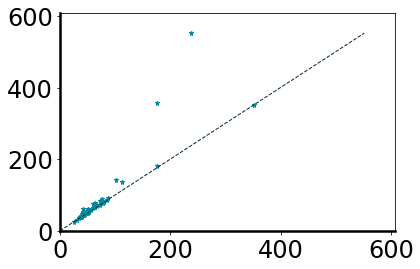

In [10]:
dgm = rng.diagram(G_fibro)
rng.plot_dgm(dgm)
rng.ring_score(dgm)
plt.savefig("fibro_diagram.jpg")